In [ ]:
import numpy as np
import pandas as pd
import csv
import json
from lxml import objectify
from io import StringIO
import requests
import sqlite3
from lxml import html, etree


In [96]:
df=pd.read_html("http://cdv.brightcode.pl/wolneodpracy/2018.php")
FreeDay18=pd.DataFrame(df[0])
FreeWek18=pd.DataFrame(df[1])
df1=pd.read_html("http://cdv.brightcode.pl/wolneodpracy/2019.php")
FreeDay19=pd.DataFrame(df1[0])
FreeWek19=pd.DataFrame(df1[1])
print(FreeWek19)


   Ile dni?                     Data  \
0         4  29 grudnia - 1 stycznia   
1         3         20 - 22 kwietnia   
2         5               1 - 5 maja   
3         4          20 - 23 czerwca   
4         4         15 - 18 sierpnia   
5         3          1 - 3 listopada   
6         3         9 - 11 listopada   
7         5          25 - 29 grudnia   

                                Które święta zawiera  
0                Nowy Rok, Świętej Bożej Rodzicielki  
1                Wielkanoc, Poniedziałek Wielkanocny  
2            Święto Pracy, Święto Konstytucji 3 Maja  
3                                         Boże Ciało  
4  Święto Wojska Polskiego, Wniebowzięcie Najświę...  
5                                Wszystkich Świętych  
6                              Święto Niepodległości  
7  Boże Narodzenie (pierwszy dzień), Boże Narodze...  


In [84]:
tables1=[FreeDay18, FreeDay19]
FreeDays=pd.concat(tables1)
FreeDays.insert(1, "year", [2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,], True)

tables2=[df[1], df1[1]]
FreeWeekends=pd.concat(tables2)
FreeWeekends.insert(1, "years", [2018,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019,2019,2019], True)
FreeWeekends

,Ile dni?,years,Data,Które święta zawiera
0,3,2018,30 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki"
1,3,2018,31 marca - 2 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny"
2,4,2018,28 kwietnia - 1 maja,Święto Pracy
3,4,2018,3 - 6 maja,Święto Konstytucji 3 Maja
4,4,2018,31 maja - 3 czerwca,Boże Ciało
5,4,2018,1 - 4 listopada,Wszystkich Świętych
6,5,2018,22 - 26 grudnia,"pierwszy dzień świąt, drugi dzień świąt"
0,4,2019,29 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki"
1,3,2019,20 - 22 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny"
2,5,2019,1 - 5 maja,"Święto Pracy, Święto Konstytucji 3 Maja"


In [78]:
FreeDays.to_csv('out.csv')
!type out.csv
FreeWeekends.to_csv('out2.csv')
!type out2.csv

,Data,year,DzieĹ„,ĹšwiÄ™ta
0,1 styczeĹ„,2018,poniedziaĹ‚ek,Nowy Rok
1,6 styczeĹ„,2018,sobota,ĹšwiÄ™to Trzech KrĂłli
2,1 kwiecieĹ„,2018,niedziela,Wielkanoc
3,2 kwiecieĹ„,2018,poniedziaĹ‚ek,PoniedziaĹ‚ek Wielkanocny
4,1 maj,2018,wtorek,ĹšwiÄ™to Pracy
5,3 maj,2018,czwartek,ĹšwiÄ™to Konstytucji 3 Maja
6,20 maj,2018,niedziela,Zielone ĹšwiÄ…tki
7,31 maj,2018,czwartek,BoĹĽe CiaĹ‚o
8,15 sierpieĹ„,2018,Ĺ›roda,WniebowziÄ™cie NajĹ›wiÄ™tszej Maryi Panny
9,1 listopad,2018,czwartek,Wszystkich ĹšwiÄ™tych
10,11 listopad,2018,niedziela,ĹšwiÄ™to NiepodlegĹ‚oĹ›ci
11,25 grudzieĹ„,2018,wtorek,Pierwszy dzieĹ„ BoĹĽego Narodzenia
12,26 grudzieĹ„,2018,Ĺ›roda,Drugi dzieĹ„ BoĹĽego Narodzenia
0,1 styczeĹ„,2019,wtorek,Nowy Rok
1,6 styczeĹ„,2019,niedziela,ĹšwiÄ™to Trzech KrĂłli
2,21 kwiecieĹ„,2019,niedziela,Wielkanoc
3,22 kwiecieĹ„,2019,poniedziaĹ‚ek,PoniedziaĹ‚ek Wielkanocny
4,1 maj,2019,Ĺ›roda,ĹšwiÄ™to Pracy
5,3 maj,2019,piÄ…tek,ĹšwiÄ™to Konstytucji 3 Maja
6,9 czerwiec,2019,niedziela,Zielone ĹšwiÄ…tki
7,20 czerwi

In [79]:
dni = pd.read_csv('out.csv')
weekendy = pd.read_csv('out2.csv')
weekendy



,Unnamed: 0,Ile dni?,years,Data,Które święta zawiera
0,0,3,2018,30 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki"
1,1,3,2018,31 marca - 2 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny"
2,2,4,2018,28 kwietnia - 1 maja,Święto Pracy
3,3,4,2018,3 - 6 maja,Święto Konstytucji 3 Maja
4,4,4,2018,31 maja - 3 czerwca,Boże Ciało
5,5,4,2018,1 - 4 listopada,Wszystkich Świętych
6,6,5,2018,22 - 26 grudnia,"pierwszy dzień świąt, drugi dzień świąt"
7,0,4,2019,29 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki"
8,1,3,2019,20 - 22 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny"
9,2,5,2019,1 - 5 maja,"Święto Pracy, Święto Konstytucji 3 Maja"


In [80]:
dni["day"]=""
dni["month"]=""
dni["day"] = dni["Dzień"]


dni["day"] = dni["Data"].str.extract('(\d+)').astype(int)
dni["month"] = dni["Data"].str.extract('(\D+)')

dni

,Unnamed: 0,Data,year,Dzień,Święta,day,month
0,0,1 styczeń,2018,poniedziałek,Nowy Rok,1,styczeń
1,1,6 styczeń,2018,sobota,Święto Trzech Króli,6,styczeń
2,2,1 kwiecień,2018,niedziela,Wielkanoc,1,kwiecień
3,3,2 kwiecień,2018,poniedziałek,Poniedziałek Wielkanocny,2,kwiecień
4,4,1 maj,2018,wtorek,Święto Pracy,1,maj
5,5,3 maj,2018,czwartek,Święto Konstytucji 3 Maja,3,maj
6,6,20 maj,2018,niedziela,Zielone Świątki,20,maj
7,7,31 maj,2018,czwartek,Boże Ciało,31,maj
8,8,15 sierpień,2018,środa,Wniebowzięcie Najświętszej Maryi Panny,15,sierpień
9,9,1 listopad,2018,czwartek,Wszystkich Świętych,1,listopad


In [81]:
weekendy["month"]=""
weekendy["month"] = "grudzien-styczen","marzec-kwiecien","kwiecien-maj","maj","maj-czerwiec","listopad","grudzien","grudzien-styczen","kwiecien","maj","czerwiec","sierpien","listopad","listopad","grudzien"
weekendy

,Unnamed: 0,Ile dni?,years,Data,Które święta zawiera,month
0,0,3,2018,30 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki",grudzien-styczen
1,1,3,2018,31 marca - 2 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny",marzec-kwiecien
2,2,4,2018,28 kwietnia - 1 maja,Święto Pracy,kwiecien-maj
3,3,4,2018,3 - 6 maja,Święto Konstytucji 3 Maja,maj
4,4,4,2018,31 maja - 3 czerwca,Boże Ciało,maj-czerwiec
5,5,4,2018,1 - 4 listopada,Wszystkich Świętych,listopad
6,6,5,2018,22 - 26 grudnia,"pierwszy dzień świąt, drugi dzień świąt",grudzien
7,0,4,2019,29 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki",grudzien-styczen
8,1,3,2019,20 - 22 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny",kwiecien
9,2,5,2019,1 - 5 maja,"Święto Pracy, Święto Konstytucji 3 Maja",maj


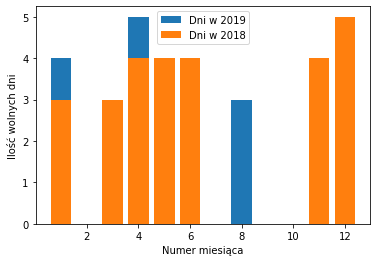

In [269]:
import matplotlib.pyplot as plt
import matplotlib

#index19 = FreeWek19.index
#dlugosc19=len(index19)
#index18 = FreeWek18.index
#dlugosc18 =len(index18)

plt.bar([1,3,4,5,6,8,11,12], FreeWek19["Ile dni?"], label = "Dni w 2019")
plt.bar([1,3,4,5,6,11,12], FreeWek18["Ile dni?"], label = "Dni w 2018")


plt.legend()
plt.ylabel("Ilość wolnych dni")
plt.xlabel("Numer miesiąca")

plt.show()


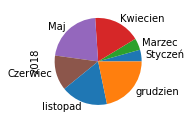

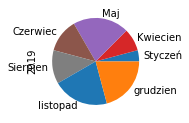

In [270]:
tab18 = {'iloscDni':[1,0,1,4,5,3,0,0,0,0,4,5]}
tab19 = {'iloscDni':[1,0,0,2,5,3,0,3,0,0,5,5]}
tabelka18=pd.DataFrame(tab18, index=['Styczeń','Luty','Marzec','Kwiecien','Maj','Czerwiec','Lipiec','Sierpien','wrzesien','pazdziernik','listopad','grudzien'])
tabelka19=pd.DataFrame(tab19, index=['Styczeń','Luty','Marzec','Kwiecien','Maj','Czerwiec','Lipiec','Sierpien','wrzesien','pazdziernik','listopad','grudzien'])

procent18=pd.DataFrame(tabelka18['iloscDni']/31*100)
procent19=pd.DataFrame(tabelka19['iloscDni']/31*100)


plot=procent18.plot.pie(y='iloscDni', figsize=(2,2), legend=False, ylabel='2018')
plot=procent19.plot.pie(y='iloscDni', figsize=(2,2), legend=False, ylabel='2019')

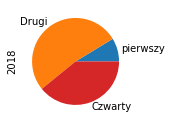

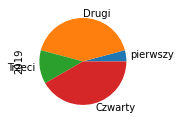

In [178]:
kw18 = {'iloscDni':[2,12,0,9]}
kw19 = {'iloscDni':[1,10,3,10]}

kwartaly18=pd.DataFrame(kw18, index=['pierwszy', 'Drugi', 'Trzeci', 'Czwarty'])
kwartaly19=pd.DataFrame(kw19, index=['pierwszy', 'Drugi', 'Trzeci', 'Czwarty'])

Pkwartaly18=pd.DataFrame(kwartaly18['iloscDni']/31*100)
Pkwartaly19=pd.DataFrame(kwartaly19['iloscDni']/31*100)

plot=Pkwartaly18.plot.pie(y='iloscDni', figsize=(2,2), legend=False, ylabel='2018')
plot=Pkwartaly19.plot.pie(y='iloscDni', figsize=(2,2), legend=False, ylabel='2019')

<ipython-input-294-75581fac0197>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['Otwarcie'] = pd.to_numeric(b['Otwarcie'])


<AxesSubplot:xlabel='Numer dnia', ylabel='Otwarcie'>

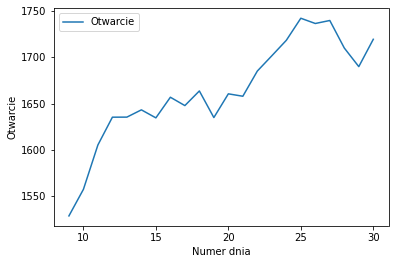

In [294]:
df=pd.read_html("https://www.biznesradar.pl/notowania-historyczne/WIG20,3")
a=pd.DataFrame(df[0])


del a['Obrót']
del a['Max']
del a['Min']
del a['Zamknięcie']
x=a.iloc[9:]
b=x.iloc[:22]
del b['Data']

b['Otwarcie'] = pd.to_numeric(b['Otwarcie'])
b.plot.line(xlabel='Numer dnia', ylabel='Otwarcie')

<AxesSubplot:xlabel='Numer dnia', ylabel='Otwarcie'>

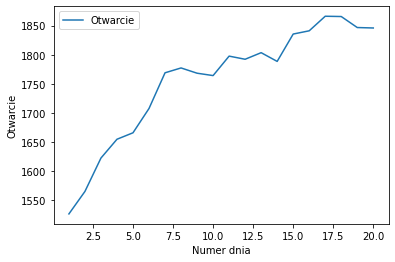

In [373]:
df2=pd.read_html("https://www.biznesradar.pl/notowania-historyczne/WIG20,3")
h=pd.DataFrame(df2[0])
df3=pd.read_html("https://www.biznesradar.pl/notowania-historyczne/WIG20,2")
v=pd.DataFrame(df3[0])

del h['Obrót']
del h['Max']
del h['Min']
del h['Zamknięcie']
m=h.iloc[:9]

del v['Obrót']
del v['Max']
del v['Min']
del v['Zamknięcie']
n=v.iloc[39:]


poł = n.append(m)
od = poł.sort_values(by=['Data'], ascending=True)
del od['Data']



xxx=od.set_index([pd.Index([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])])
xxx
xxx['Otwarcie'] = pd.to_numeric(xxx['Otwarcie'])
xxx.plot.line(xlabel='Numer dnia', ylabel='Otwarcie')

<AxesSubplot:xlabel='Numer dnia', ylabel='Otwarcie'>

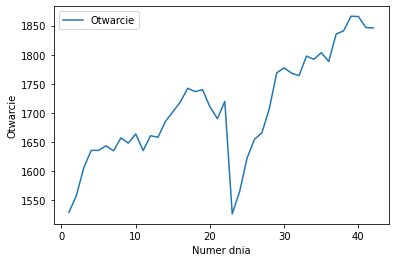

In [400]:
wyn =b.append(xxx)
wynn=wyn.set_index([pd.Index([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42])])
wynn

wynn.plot(xlabel='Numer dnia', ylabel='Otwarcie')





